In [1]:
import argparse
import copy
from collections import Counter
from decimal import Decimal as D
import os
import operator
import platform
import random
import sys
from packaging import version
from matplotlib import pyplot as plt
from matplotlib import animation
import pandas as pd
import numpy as np
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import geopandas as gpd

In [2]:
dfa = pd.read_csv(r'cluster_a.csv')
dfa

,Unnamed: 0,index,Longitude,Lattitude,day,Hours,Time,Cluster,speed
0,0,6,106.874829,-6.153055,5.0,23.0,5.958333,0,11.851472
1,1,11,106.916109,-6.123750,6.0,23.0,6.958333,0,11.722630
2,2,14,106.949827,-6.158177,5.0,16.0,5.666667,0,15.234874
3,3,26,106.853990,-6.140056,6.0,22.0,6.916667,0,21.881697
4,4,42,106.941768,-6.158081,6.0,12.0,6.500000,0,16.241412
...,...,...,...,...,...,...,...,...,...
234727,234727,999979,106.727535,-6.103079,6.0,22.0,6.916667,0,12.074987
234728,234728,999983,106.734516,-6.101151,6.0,22.0,6.916667,0,15.116999
234729,234729,999992,106.747805,-6.193347,5.0,23.0,5.958333,0,14.339325
234730,234730,999993,106.759522,-6.105141,5.0,16.0,5.666667,0,16.516553


In [3]:
dfb = pd.read_csv(r'cluster_b.csv')
dfb

,Unnamed: 0,index,Longitude,Lattitude,day,Hours,Time,Cluster,speed
0,0,3,106.865573,-6.151809,7.0,7.0,7.291667,1,27.506645
1,1,9,106.964861,-6.190846,7.0,6.0,7.250000,1,16.096621
2,2,35,106.917588,-6.110909,7.0,15.0,7.625000,1,16.226509
3,3,56,106.891705,-6.156828,7.0,3.0,7.125000,1,17.044851
4,4,88,106.966887,-6.117366,7.0,13.0,7.541667,1,22.345648
...,...,...,...,...,...,...,...,...,...
72361,72361,999888,106.743585,-6.198631,7.0,13.0,7.541667,1,25.492535
72362,72362,999891,106.742520,-6.194444,7.0,2.0,7.083333,1,21.031161
72363,72363,999892,106.765650,-6.154830,7.0,22.0,7.916667,1,22.924929
72364,72364,999910,106.737807,-6.210481,7.0,3.0,7.125000,1,15.016815


In [4]:
dfc = pd.read_csv(r'cluster_c.csv')
dfc

,Unnamed: 0,index,Longitude,Lattitude,day,Hours,Time,Cluster,speed
0,0,2,106.948362,-6.109304,2.0,1.0,2.041667,2,42.441746
1,1,23,106.941867,-6.190445,1.0,19.0,1.791667,2,47.304468
2,2,24,106.958853,-6.155525,1.0,19.0,1.791667,2,68.483862
3,3,66,106.941390,-6.111820,1.0,9.0,1.375000,2,53.409898
4,4,73,106.887881,-6.118425,1.0,6.0,1.250000,2,28.955769
...,...,...,...,...,...,...,...,...,...
95642,95642,999954,106.716425,-6.171503,1.0,9.0,1.375000,2,36.746941
95643,95643,999955,106.736631,-6.129818,9.0,1.0,9.041667,2,54.571550
95644,95644,999959,106.743345,-6.134209,1.0,7.0,1.291667,2,49.555786
95645,95645,999984,106.746230,-6.107516,2.0,4.0,2.166667,2,44.684699


In [5]:
dfd = pd.read_csv(r'cluster_d.csv')
dfd

,Unnamed: 0,index,Longitude,Lattitude,day,Hours,Time,Cluster,speed
0,0,0,106.878621,-6.109393,3.0,22.0,3.916667,3,51.518819
1,1,1,106.902867,-6.171421,4.0,14.0,4.583333,3,63.528887
2,2,8,106.951728,-6.185348,4.0,7.0,4.291667,3,92.722359
3,3,10,106.968301,-6.138512,4.0,21.0,4.875000,3,60.078480
4,4,12,106.884552,-6.128815,5.0,11.0,5.458333,3,72.453032
...,...,...,...,...,...,...,...,...,...
324918,324918,999985,106.723380,-6.177866,3.0,22.0,3.916667,3,85.343191
324919,324919,999990,106.766151,-6.135929,4.0,4.0,4.166667,3,38.071163
324920,324920,999991,106.700424,-6.122069,4.0,23.0,4.958333,3,45.106572
324921,324921,999996,106.689090,-6.152213,5.0,2.0,5.083333,3,48.532607


In [6]:
dfe = pd.read_csv(r'cluster_e.csv')
dfe

,Unnamed: 0,index,Longitude,Lattitude,day,Hours,Time,Cluster,speed
0,0,4,106.911165,-6.099174,3.0,9.0,3.375000,4,18.124264
1,1,5,106.946502,-6.108826,3.0,18.0,3.750000,4,15.752000
2,2,7,106.909155,-6.131456,3.0,4.0,3.166667,4,20.057713
3,3,15,106.937032,-6.101121,3.0,2.0,3.083333,4,28.195186
4,4,16,106.857797,-6.149391,2.0,11.0,2.458333,4,18.611403
...,...,...,...,...,...,...,...,...,...
272327,272327,999987,106.766784,-6.156647,3.0,3.0,3.125000,4,19.061062
272328,272328,999988,106.725350,-6.146976,3.0,15.0,3.625000,4,29.347060
272329,272329,999989,106.714150,-6.109448,0.0,23.0,0.958333,4,24.859635
272330,272330,999998,106.754378,-6.123206,3.0,20.0,3.833333,4,17.805426


In [7]:
alldf = pd.concat([dfa, dfb, dfc, dfd, dfe], ignore_index=True)
alldf

,Unnamed: 0,index,Longitude,Lattitude,day,Hours,Time,Cluster,speed
0,0,6,106.874829,-6.153055,5.0,23.0,5.958333,0,11.851472
1,1,11,106.916109,-6.123750,6.0,23.0,6.958333,0,11.722630
2,2,14,106.949827,-6.158177,5.0,16.0,5.666667,0,15.234874
3,3,26,106.853990,-6.140056,6.0,22.0,6.916667,0,21.881697
4,4,42,106.941768,-6.158081,6.0,12.0,6.500000,0,16.241412
...,...,...,...,...,...,...,...,...,...
999995,272327,999987,106.766784,-6.156647,3.0,3.0,3.125000,4,19.061062
999996,272328,999988,106.725350,-6.146976,3.0,15.0,3.625000,4,29.347060
999997,272329,999989,106.714150,-6.109448,0.0,23.0,0.958333,4,24.859635
999998,272330,999998,106.754378,-6.123206,3.0,20.0,3.833333,4,17.805426


In [8]:
# min_value = alldf['speed'].min()
# max_value = alldf['speed'].max()
# min_max_scale(alldf['speed'])
# normspeed = []
# justtest = alldf['speed'].to_numpy()
# for i in range(1000000):
#     scaled = (justtest[i] - min_value) / (max_value - min_value)
#     normspeed.append(scaled) 
# normspeed

In [9]:
# alldf['norm_speed']=pd.DataFrame(normspeed) 
# alldf

In [8]:
def manhattan_distance(destination, initial):
    distance = 6371 * (abs(2 * np.arctan2(np.sqrt(np.square(np.sin((abs(destination[0] - initial[0]) * np.pi / 180) / 2))), 
                                  np.sqrt(1-(np.square(np.sin((abs(destination[0] - initial[0]) * np.pi / 180) / 2)))))) + \
                                     abs(2 * np.arctan2(np.sqrt(np.square(np.sin((abs(destination[1] - initial[1]) * np.pi / 180) / 2))), 
                                  np.sqrt(1-(np.square(np.sin((abs(destination[1] - initial[1]) * np.pi / 180) / 2)))))))
    return distance

In [11]:
#test = alldf[['Lattitude', 'Longitude']][:10000]
#test

,Lattitude,Longitude
0,-6.153055,106.874829
1,-6.123750,106.916109
2,-6.158177,106.949827
3,-6.140056,106.853990
4,-6.158081,106.941768
...,...,...
9995,-6.200830,106.785048
9996,-6.277199,106.789446
9997,-6.205047,106.803644
9998,-6.201581,106.789339


In [12]:
#testsp = alldf['speed'].sample(n=100000)
#testsp

497850    73.614464
402953    79.130288
394958    56.844775
325947    30.042261
312501    42.203529
            ...    
479108    95.894097
754719    33.750511
149233    12.079363
238508    12.975924
218588    22.050573
Name: speed, Length: 100000, dtype: float64

In [10]:
sample = alldf.sample(n=100000)
sample

,Unnamed: 0,index,Longitude,Lattitude,day,Hours,Time,Cluster,speed
742903,15235,56024,106.940620,-6.168261,3.0,21.0,3.875000,4,20.375231
690140,287395,884553,106.814853,-6.320122,4.0,12.0,4.500000,3,55.156465
769525,41857,153598,106.871013,-6.274588,3.0,11.0,3.458333,4,20.584391
460186,57441,175570,106.858695,-6.290822,4.0,6.0,4.250000,3,59.692082
637125,234380,721918,106.708341,-6.165312,5.0,10.0,5.416667,3,63.354406
...,...,...,...,...,...,...,...,...,...
771263,43595,160366,106.833683,-6.210204,2.0,15.0,2.625000,4,18.899899
9969,9969,42109,106.965762,-6.099247,5.0,15.0,5.625000,0,12.565123
239024,4292,60643,106.839278,-6.334148,7.0,22.0,7.916667,1,24.789606
143499,143499,611038,106.956032,-6.176725,6.0,18.0,6.750000,0,12.662665


In [11]:
test = sample[['Lattitude', 'Longitude']]
test

,Lattitude,Longitude
742903,-6.168261,106.940620
690140,-6.320122,106.814853
769525,-6.274588,106.871013
460186,-6.290822,106.858695
637125,-6.165312,106.708341
...,...,...
771263,-6.210204,106.833683
9969,-6.099247,106.965762
239024,-6.334148,106.839278
143499,-6.176725,106.956032


In [12]:
testsp = sample['speed']
testsp

742903    20.375231
690140    55.156465
769525    20.584391
460186    59.692082
637125    63.354406
            ...    
771263    18.899899
9969      12.565123
239024    24.789606
143499    12.662665
258133    15.829997
Name: speed, Length: 100000, dtype: float64

In [13]:
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import box
from shapely.geometry import Point
from copy import copy
from shapely.ops import unary_union

In [17]:
plz_shape_df = gpd.read_file('Jakarta Map.shp', dtype={'plz': str})
plz_shape_df['name'] = plz_shape_df['name'].str.upper()
plz_shape_df

,fid,id,@id,admin_leve,boundary,is_in_muni,is_in_prov,is_in_town,name,type,note,is_in_city,@relations,Clustered_,Clustere_1,geometry
0,1.0,relation/5802121,relation/5802121,7,administrative,Pademangan,DKI Jakarta,Jakarta Utara,ANCOL,boundary,None,None,None,1.0,0.005710,"POLYGON ((106.82334 -6.11568, 106.82760 -6.116..."
1,2.0,relation/5802122,relation/5802122,7,administrative,Tambora,DKI Jakarta,Jakarta Barat,PEKOJAN,boundary,None,None,None,1.0,0.002741,"POLYGON ((106.80427 -6.13241, 106.80582 -6.132..."
2,3.0,relation/5802123,relation/5802123,7,administrative,Cilincing,DKI Jakarta,Jakarta Utara,MARUNDA,boundary,None,None,None,2.0,0.002398,"POLYGON ((106.95896 -6.13234, 106.95897 -6.132..."
3,4.0,relation/5802124,relation/5802124,7,administrative,Pulo Gadung,DKI Jakarta,Jakarta Timur,KAYU PUTIH,boundary,None,None,None,4.0,0.007423,"POLYGON ((106.87588 -6.17886, 106.87592 -6.178..."
4,5.0,relation/5802125,relation/5802125,7,administrative,Koja,DKI Jakarta,Jakarta Utara,LAGOA,boundary,None,None,None,2.0,0.002627,"POLYGON ((106.90305 -6.11204, 106.90598 -6.112..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,264.0,relation/7198542,relation/7198542,7,administrative,Tebet,DKI Jakarta,Jakarta Selatan,MENTENG DALAM,boundary,None,None,None,4.0,0.004111,"POLYGON ((106.84733 -6.22898, 106.84715 -6.229..."
264,265.0,relation/7210655,relation/7210655,7,administrative,Tebet,DKI Jakarta,Jakarta Selatan,BUKIT DURI,boundary,None,None,None,4.0,0.005254,"POLYGON ((106.85894 -6.21635, 106.85915 -6.216..."
265,266.0,relation/7212530,relation/7212530,7,administrative,Menteng,DKI Jakarta,Jakarta Pusat,MENTENG,boundary,None,None,None,1.0,0.005596,"POLYGON ((106.84499 -6.20363, 106.84583 -6.204..."
266,267.0,relation/7212612,relation/7212612,7,administrative,Menteng,DKI Jakarta,Jakarta Pusat,PEGANGSAAN,boundary,None,None,None,4.0,0.002170,"POLYGON ((106.84305 -6.20089, 106.84281 -6.200..."


In [20]:
bounds_all = plz_shape_df["geometry"].bounds
bounds_all

,minx,miny,maxx,maxy
0,106.808028,-6.141699,106.872964,-6.104253
1,106.800217,-6.142064,106.807917,-6.131865
2,106.944728,-6.132579,106.970877,-6.091075
3,106.875422,-6.190041,106.894170,-6.166292
4,106.903054,-6.119108,106.917436,-6.108268
...,...,...,...,...
263,106.834700,-6.243231,106.847555,-6.220969
264,106.851974,-6.225470,106.865572,-6.214706
265,106.820700,-6.209144,106.848466,-6.194331
266,106.840271,-6.208427,106.855778,-6.195497


In [36]:
# select the columns that you with to use for the dissolve and that will be retained
state_boundary = plz_shape_df[['Clustered_', 'geometry']]

# dissolve the state boundary by region 
jkt = state_boundary.dissolve(by='Clustered_')
jkt['yes'] = ['y', 'y', 'y', 'y', 'y', 'y']
# view the resulting geodataframe
compjkt = jkt.dissolve(by='yes')
pd.set_option('display.max_colwidth', None)
compjkt

geometry
yes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [37]:
compjkt['geometry']

yes
y    MULTIPOLYGON (((106.79272 -6.35282, 106.79249 -6.35242, 106.79252 -6.35226, 106.79320 -6.35170, 106.79394 -6.35136, 106.79399 -6.35128, 106.79403 -6.35067, 106.79398 -6.35057, 106.79373 -6.35045, 106.79375 -6.35023, 106.79367 -6.34996, 106.79357 -6.34981, 106.79351 -6.34982, 106.79348 -6.34992, 106.79332 -6.34995, 106.79321 -6.35011, 106.79311 -6.35015, 106.79305 -6.35010, 106.79306 -6.34996, 106.79296 -6.34993, 106.79290 -6.34984, 106.79289 -6.34971, 106.79302 -6.34967, 106.79307 -6.34959, 106.79304 -6.34952, 106.79295 -6.34948, 106.79275 -6.34881, 106.79239 -6.34855, 106.79244 -6.34833, 106.79255 -6.34821, 106.79262 -6.34798, 106.79334 -6.34757, 106.79389 -6.34701, 106.79419 -6.34680, 106.79418 -6.34668, 106.79422 -6.34663, 106.79441 -6.34654, 106.79452 -6.34660, 106.79547 -6.34597, 106.79561 -6.34596, 106.79580 -6.34610, 106.79586 -6.34634, 106.79593 -6.34643, 106.79622 -6.34658, 106.79650 -6.34661, 106.79682 -6.34638, 106.79708 -6.34607, 106.79721 -6.34599, 106.79730 -6.34

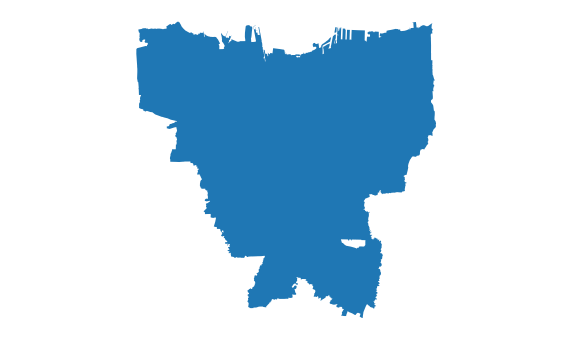

In [35]:
# create the plot
fig, ax = plt.subplots(figsize = (10,6))

# plot the data 
compjkt.reset_index().plot(column = 'yes', ax=ax)

# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

In [40]:
varbound=np.array([compjkt['geometry']]*n_spot)
len(varbound)

100

In [44]:
#def f(X):
#    initial, speed, fitness = alldf[['Lattitude', 'Longitude']].values, alldf['speed'].values, 0
#    for i in range(len(initial)):
#        distance = manhattan_distance(initial[i],X)
#        fitness += speed[i]/distance
    return fitness

n_spot = 120

varbound=np.array([[-6.356, -6.097260],[106.67, 106.97]]*n_spot)
# algorithm_param = {'max_num_iteration': 10000,\
#                    'population_size':100,\
#                    'mutation_probability':0.15,\
#                    'elit_ratio': 0.05,\
#                    'crossover_probability': 0.6,\
#                    'parents_portion': 0.3,\
#                    'crossover_type':'uniform',\
#                    'max_iteration_without_improv':None}
# model=ga(function=f,dimension=2,variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model=ga(function=f,dimension=2* n_spot,variable_type='real', variable_boundaries=varbound, function_timeout = 200)

model.run()

100%|██████████| 100/100 [36:06<00:00, 21.67s/it]

__________________________________________________ 0.0% GA is running...

__________________________________________________ 0.1% GA is running...

KeyboardInterrupt: 

100%|██████████| 100/100 [03:49<00:00,  2.29s/it]

__________________________________________________ 0.0% GA is running...

 The best solution found:                                                                           
 [ -6.35598938 106.67000835  -6.15005565 106.94815817  -6.15886366
 106.82195857  -6.1461815  106.95363102  -6.14647059 106.81407311
  -6.14224443 106.81153576  -6.32373666 106.96442483  -6.20327456
 106.84884474  -6.1609297  106.70681963  -6.23639372 106.7979944
  -6.18833334 106.76475691  -6.18680304 106.93031264  -6.27300122
 106.77408146  -6.18112214 106.76500041  -6.25540775 106.85604232
  -6.23919572 106.80557678  -6.30828595 106.92061865  -6.27894021
 106.92234682  -6.33530524 106.88837943  -6.13681148 106.9156584
  -6.16547117 106.8928412   -6.29353005 106.83903939  -6.13726443
 106.7149612   -6.31928202 106.82247085  -6.22018429 106.88640914
  -6.30931613 106.68305351  -6.34917511 106.90206544  -6.25144975
 106.92686506  -6.14388156 106.78596096  -6.25504992 106.80595484
  -6.30975419 106.76326351  -6.3306071  106.91280699  -6.13192809
 106.7407486   -6.1771609  106.71719148  -

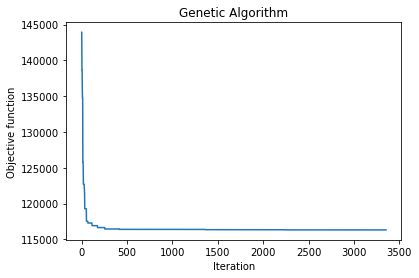

In [13]:
def f(X):
    initial, speed, fitness = test.values, testsp.values, 0
    for i in range(len(initial)):
        distance = manhattan_distance(initial[i],X)
        fitness += speed[i]/distance
    return fitness

n_spot = 120

varbound=np.array([[-6.356, -6.097260],[106.67, 106.97]]*n_spot)
# algorithm_param = {'max_num_iteration': 10000,\
#                    'population_size':100,\
#                    'mutation_probability':0.15,\
#                    'elit_ratio': 0.05,\
#                    'crossover_probability': 0.6,\
#                    'parents_portion': 0.3,\
#                    'crossover_type':'uniform',\
#                    'max_iteration_without_improv':None}
# model=ga(function=f,dimension=2,variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model=ga(function=f,dimension=2* n_spot,variable_type='real', variable_boundaries=varbound, function_timeout = 20)

model.run()

In [14]:
Coordinates = model.best_variable
Coordinates 

array([ -6.35598938, 106.67000835,  -6.15005565, 106.94815817,
        -6.15886366, 106.82195857,  -6.1461815 , 106.95363102,
        -6.14647059, 106.81407311,  -6.14224443, 106.81153576,
        -6.32373666, 106.96442483,  -6.20327456, 106.84884474,
        -6.1609297 , 106.70681963,  -6.23639372, 106.7979944 ,
        -6.18833334, 106.76475691,  -6.18680304, 106.93031264,
        -6.27300122, 106.77408146,  -6.18112214, 106.76500041,
        -6.25540775, 106.85604232,  -6.23919572, 106.80557678,
        -6.30828595, 106.92061865,  -6.27894021, 106.92234682,
        -6.33530524, 106.88837943,  -6.13681148, 106.9156584 ,
        -6.16547117, 106.8928412 ,  -6.29353005, 106.83903939,
        -6.13726443, 106.7149612 ,  -6.31928202, 106.82247085,
        -6.22018429, 106.88640914,  -6.30931613, 106.68305351,
        -6.34917511, 106.90206544,  -6.25144975, 106.92686506,
        -6.14388156, 106.78596096,  -6.25504992, 106.80595484,
        -6.30975419, 106.76326351,  -6.3306071 , 106.91

In [15]:
coordinates1 = Coordinates.reshape(n_spot, 2)

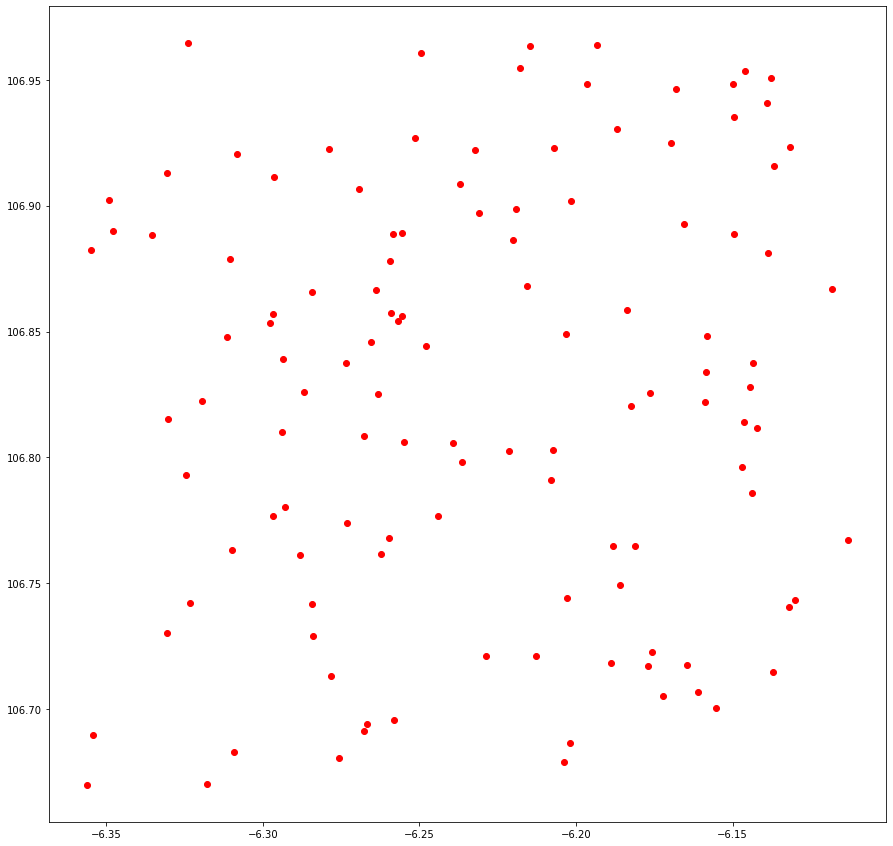

In [16]:
plt.figure(figsize = [15, 15])
plt.scatter(coordinates1[:, 0], coordinates1[:,1], c='red')

In [17]:
np.savetxt('Coordinates_Final2.csv', coordinates1, delimiter=",") 